In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [66]:
import warnings
warnings.filterwarnings("ignore")

In [67]:
movies_df = pd.read_csv('/content/movies.csv')


ratings_df = pd.read_csv("/content/ratings.csv")

In [68]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [69]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [70]:
print("shape of the ratings_df dataset=",ratings_df.shape)
print("shape of the movies_df dataset=",movies_df.shape)

shape of the ratings_df dataset= (105339, 4)
shape of the movies_df dataset= (10329, 3)


In [71]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [72]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [73]:
movies_df.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [74]:
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [75]:
# Checking for duplicates:
df_dup = movies_df.copy()
duplicates = df_dup.duplicated()

if duplicates.any():
    print(f"{duplicates.sum()} duplicate(s) present in the dataframe:")
    print(df_dup[df_dup.duplicated() == True])
    df_dup.drop_duplicates(inplace=True)
else:
    print("No duplicates in the dataframe")

No duplicates in the dataframe


In [76]:
# Checking for duplicates:
df_dup = ratings_df.copy()
duplicates = df_dup.duplicated()

if duplicates.any():
    print(f"{duplicates.sum()} duplicate(s) present in the dataframe:")
    print(df_dup[df_dup.duplicated() == True])
    df_dup.drop_duplicates(inplace=True)
else:
    print("No duplicates in the dataframe")

No duplicates in the dataframe


In [77]:
# Checking for duplicates:
movies_df[movies_df['title'].duplicated()]

,movieId,title,genres
6270,26982,Men with Guns (1997),Drama
7963,64997,War of the Worlds (2005),Action|Sci-Fi


In [78]:
movies_df[movies_df['title']=='Men with Guns (1997)']

,movieId,title,genres
1403,1788,Men with Guns (1997),Action|Drama
6270,26982,Men with Guns (1997),Drama


In [79]:
movies_df.drop(movies_df.loc[movies_df['movieId']==26982].index,inplace=True)
movies_df.drop(movies_df.loc[movies_df['movieId']==64997].index,inplace=True)

In [80]:
movies_df.describe()

,movieId
count,10327.000000
mean,31921.558923
std,37736.960408
min,1.000000
25%,3239.000000
50%,7087.000000
75%,59875.000000
max,149532.000000


In [81]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [82]:
print("The total count of movies -")
movies_df['movieId'].value_counts().sum()

The total count of movies -


10327

In [83]:
print("Average rating of all ratings provided is -")
ratings_df['rating'].mean()

Average rating of all ratings provided is -


3.5168503593161127

array([[<Axes: title={'center': 'movieId'}>]], dtype=object)

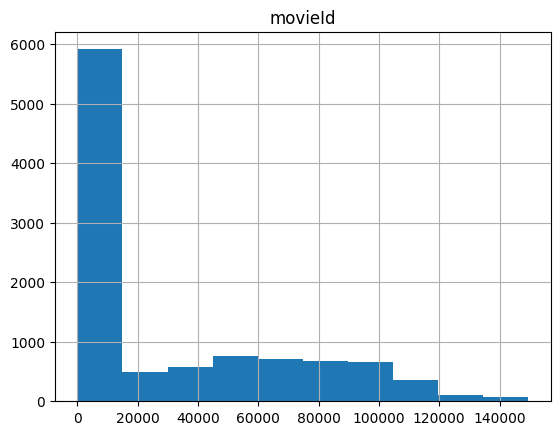

In [84]:
movies_df.hist()

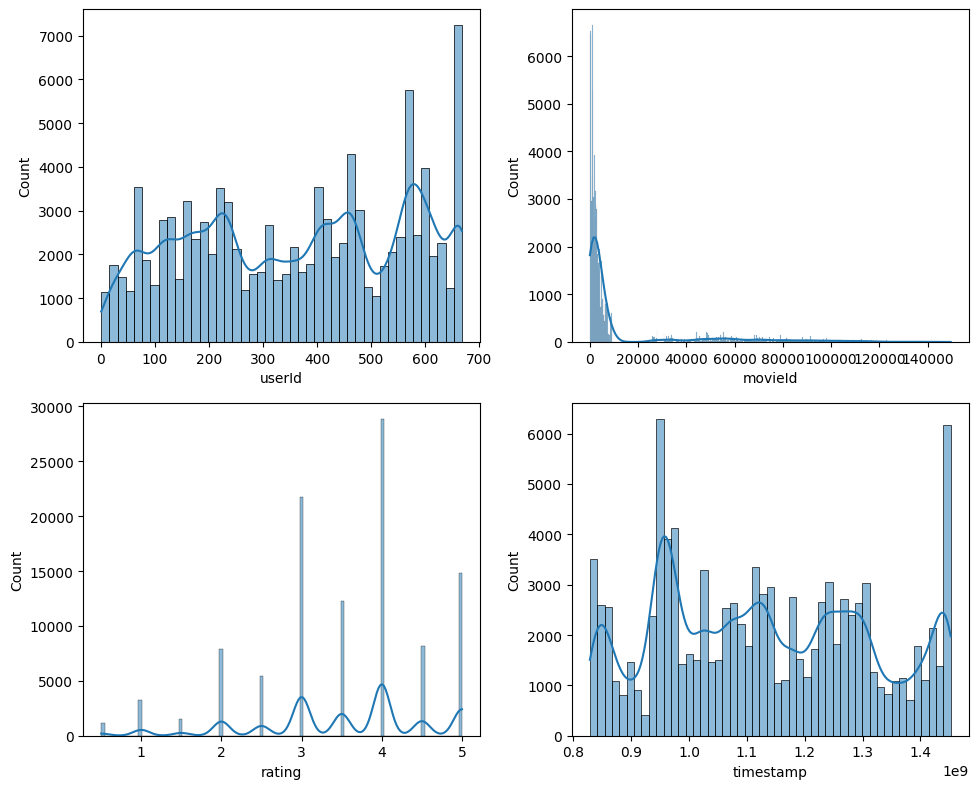

In [85]:
i=1
plt.figure(figsize=(10,8))
for j in ratings_df.columns:
    plt.subplot(2,2,i)
    sns.histplot(data=ratings_df,x=ratings_df[j],kde=True)
    i+=1
plt.tight_layout()
plt.show()

<Axes: >

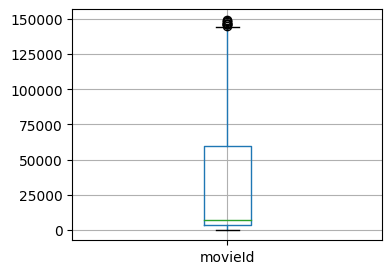

In [86]:
movies_df.boxplot(figsize=(4,3))

<Axes: >

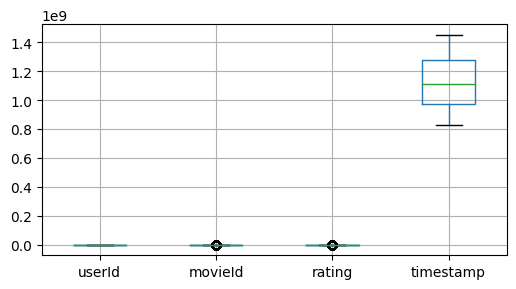

In [87]:
ratings_df.boxplot(figsize=(6,3))

In [88]:
movies_df.nunique()

movieId    10327
title      10327
genres       938
dtype: int64

In [89]:
ratings_df.nunique()

userId         668
movieId      10325
rating          10
timestamp    84686
dtype: int64

In [90]:
#!pip install wordcloud

In [91]:
from wordcloud import WordCloud

In [92]:
genres=[]
for genre in movies_df.genres:

    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)
movie_title=[]
for title in movies_df.title:
    movie_title.append(title[0:-7])
movie_title=str(movie_title)

In [93]:
wordcloud_genre=WordCloud(width=1500,height=800,background_color='black',min_font_size=2
                    ,min_word_length=3).generate(genres)
wordcloud_title=WordCloud(width=1500,height=800,background_color='cyan',min_font_size=2
                    ,min_word_length=3).generate(movie_title)

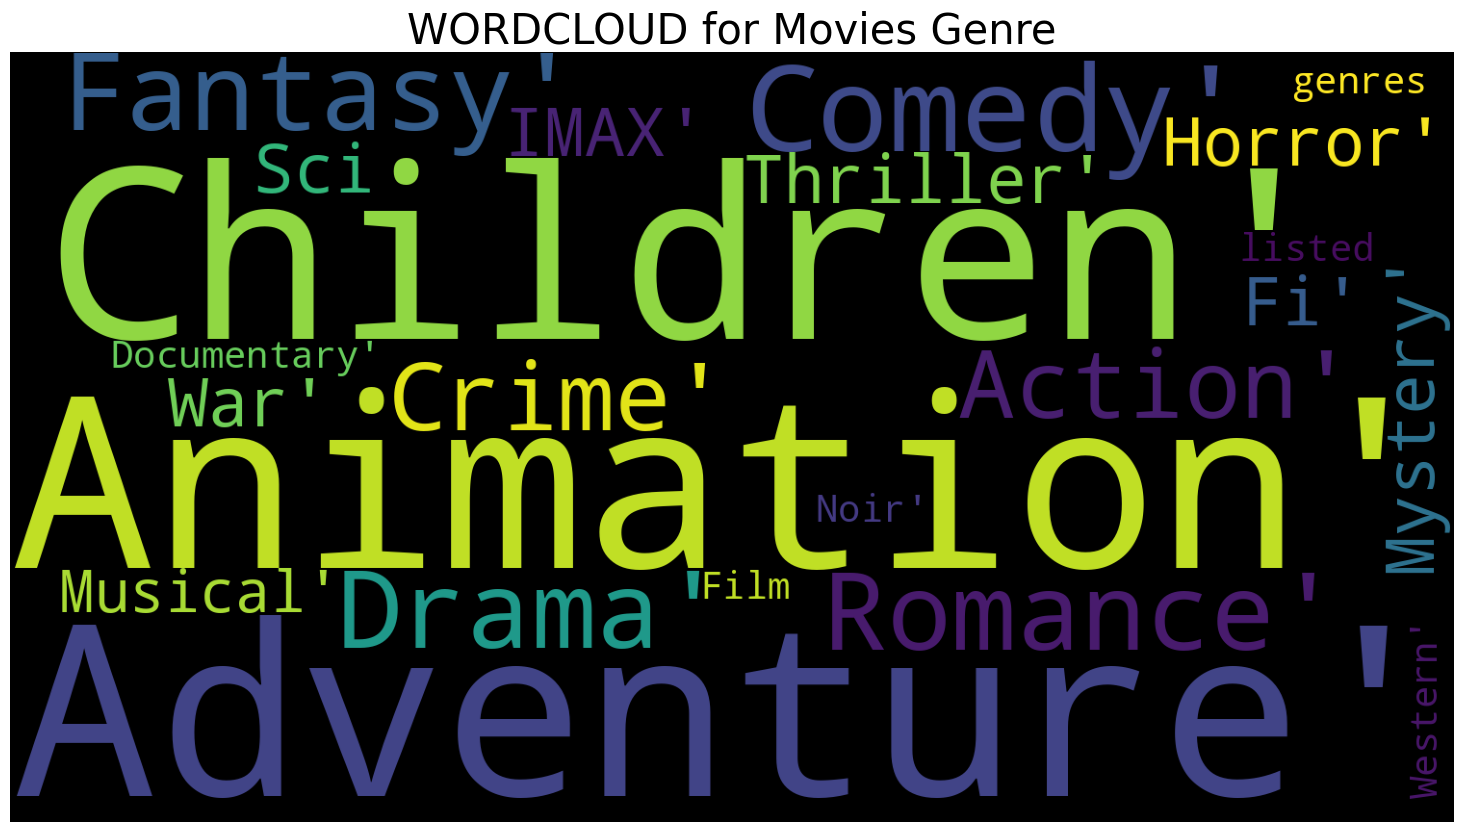

In [94]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies Genre',fontsize=30)
plt.imshow(wordcloud_genre)

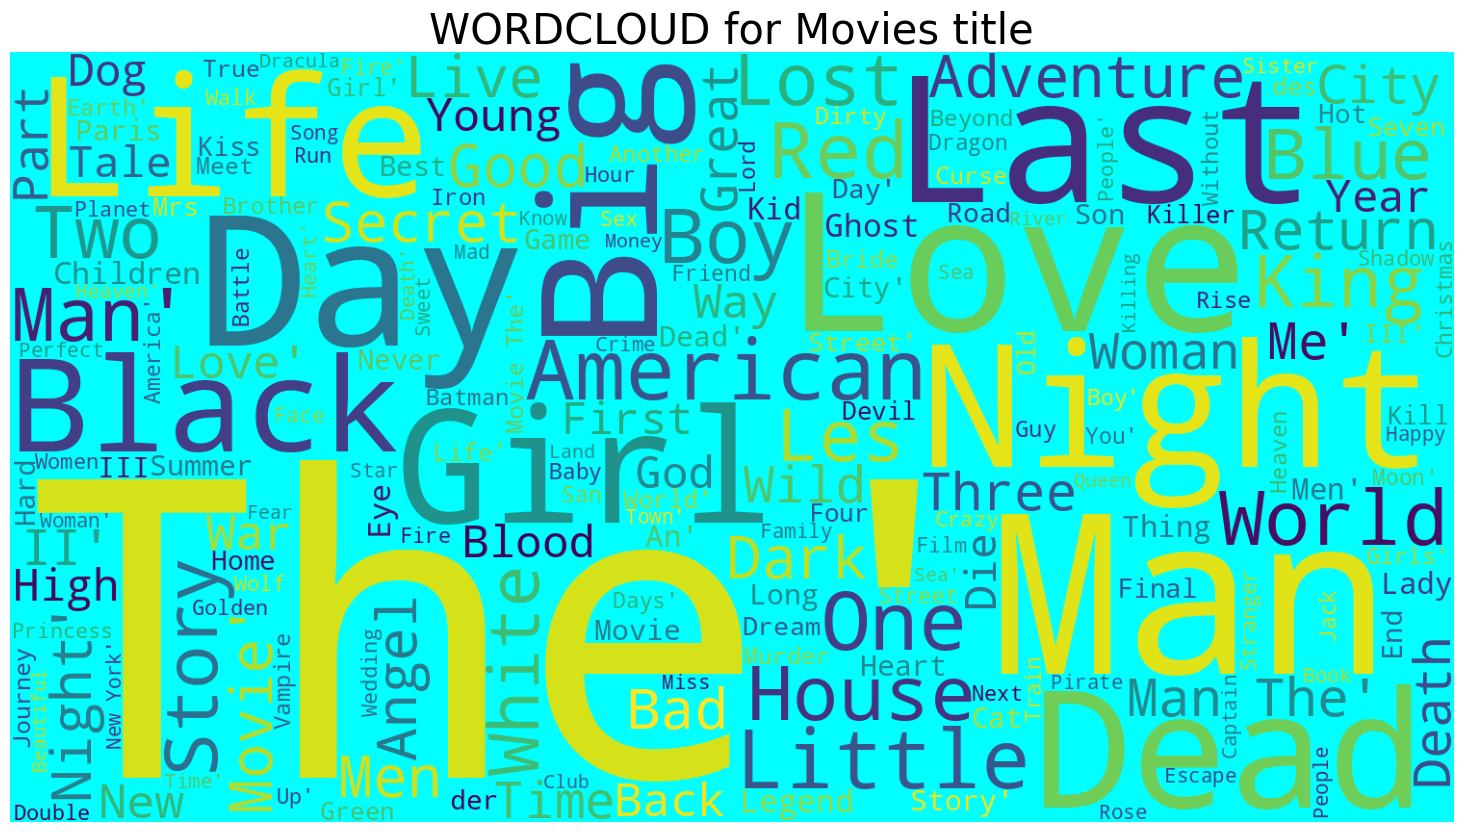

In [95]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies title',fontsize=30)
plt.imshow(wordcloud_title)

In [96]:
movies_ratings_df = pd.merge(ratings_df,movies_df,on='movieId')
movies_ratings_df.drop('timestamp', axis=1, inplace=True)
movies_ratings_df

,userId,movieId,rating,title,genres
0,1,16,4.0,Casino (1995),Crime|Drama
1,9,16,4.0,Casino (1995),Crime|Drama
2,12,16,1.5,Casino (1995),Crime|Drama
3,24,16,4.0,Casino (1995),Crime|Drama
4,29,16,3.0,Casino (1995),Crime|Drama
...,...,...,...,...,...
105329,668,140098,2.5,Runoff (2015),Drama
105330,668,140816,2.5,Tangerine (2015),Comedy|Drama
105331,668,141472,2.5,The 50 Year Argument (2014),(no genres listed)
105332,668,142488,4.0,Spotlight (2015),Thriller


In [97]:
movies_ratings_df.drop_duplicates(inplace=True)

In [99]:
movies_df.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [98]:
movies_ratings_df.head()

,userId,movieId,rating,title,genres
0,1,16,4.0,Casino (1995),Crime|Drama
1,9,16,4.0,Casino (1995),Crime|Drama
2,12,16,1.5,Casino (1995),Crime|Drama
3,24,16,4.0,Casino (1995),Crime|Drama
4,29,16,3.0,Casino (1995),Crime|Drama


In [100]:
movies_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105334 entries, 0 to 105333
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   105334 non-null  int64  
 1   movieId  105334 non-null  int64  
 2   rating   105334 non-null  float64
 3   title    105334 non-null  object 
 4   genres   105334 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [101]:
movies_ratings_df.describe()

,userId,movieId,rating
count,105334.000000,105334.000000,105334.000000
mean,364.916475,13379.584180,3.516880
std,197.487373,26169.561127,1.044878
min,1.000000,1.000000,0.500000
25%,192.000000,1073.000000,3.000000
50%,383.000000,2496.000000,3.500000
75%,557.000000,5991.000000,4.000000
max,668.000000,149532.000000,5.000000


In [102]:
movies_ranking = movies_ratings_df[['title','rating']].groupby('title').sum().sort_values('rating',ascending=False)

In [103]:
movies_ranking.head()

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5


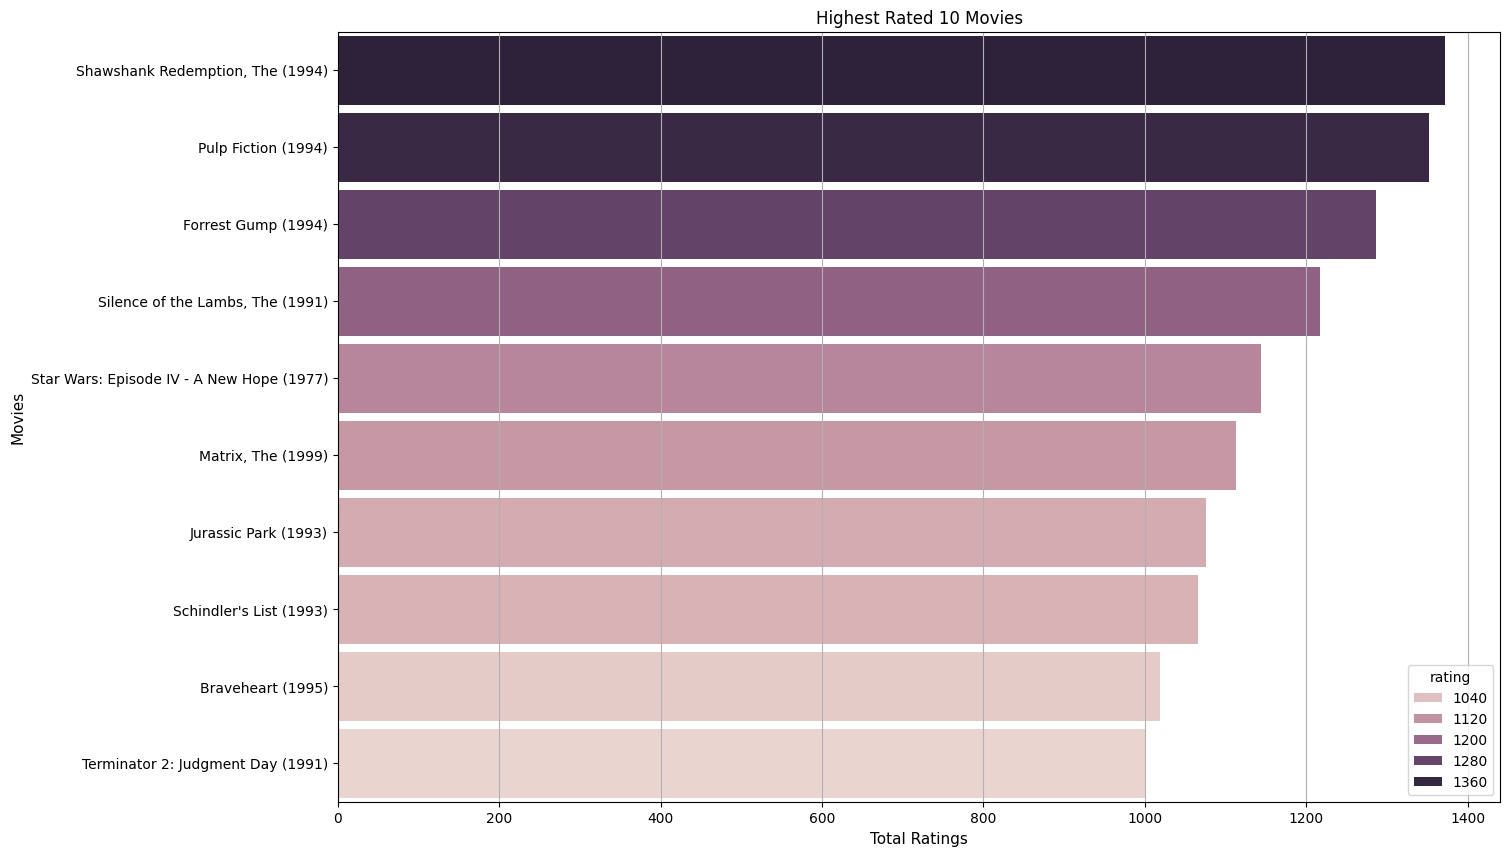

In [104]:
plt.figure(figsize=(15,10))
sns.barplot(data=movies_ranking.head(10), x='rating', y=movies_ranking.head(10).index, hue='rating', orient='h', width=.9)
plt.title("Highest Rated 10 Movies")
plt.xlabel("Total Ratings", fontsize=11)
plt.ylabel("Movies", fontsize=11)
plt.grid(True, axis='x')
plt.show()

In [105]:
#Count the ratings of all movies
movies_ratings_df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Pulp Fiction (1994)                          325
Forrest Gump (1994)                          311
Shawshank Redemption, The (1994)             308
Jurassic Park (1993)                         294
Silence of the Lambs, The (1991)             290
Star Wars: Episode IV - A New Hope (1977)    273
Matrix, The (1999)                           261
Terminator 2: Judgment Day (1991)            253
Braveheart (1995)                            248
Schindler's List (1993)                      248
Name: rating, dtype: int64

In [106]:
df1 = pd.DataFrame(movies_ratings_df.groupby('title')['rating'].count().sort_values(ascending=False))
df1.head()

,rating
title,
Pulp Fiction (1994),325
Forrest Gump (1994),311
"Shawshank Redemption, The (1994)",308
Jurassic Park (1993),294
"Silence of the Lambs, The (1991)",290


In [107]:
#Creating a dataframe with mean 'rating_movie' and total number of ratings for each movie
rating_movie = pd.DataFrame(movies_ratings_df.groupby('title')['rating'].mean())
rating_movie['Number of Ratings'] = pd.DataFrame(movies_ratings_df.groupby('title')['rating'].count())
rating_movie.head(10)

,rating,Number of Ratings
title,,
'71 (2014),3.500000,1
'Hellboy': The Seeds of Creation (2004),3.000000,1
'Round Midnight (1986),2.500000,1
'Til There Was You (1997),4.000000,3
"'burbs, The (1989)",3.125000,20
'night Mother (1986),3.000000,1
(500) Days of Summer (2009),3.932432,37
*batteries not included (1987),3.318182,11
...And Justice for All (1979),3.650000,10


In [108]:
rating_movie.sort_values('Number of Ratings', ascending = False).head(5)

,rating,Number of Ratings
title,,
Pulp Fiction (1994),4.160000,325
Forrest Gump (1994),4.138264,311
"Shawshank Redemption, The (1994)",4.454545,308
Jurassic Park (1993),3.659864,294
"Silence of the Lambs, The (1991)",4.194828,290


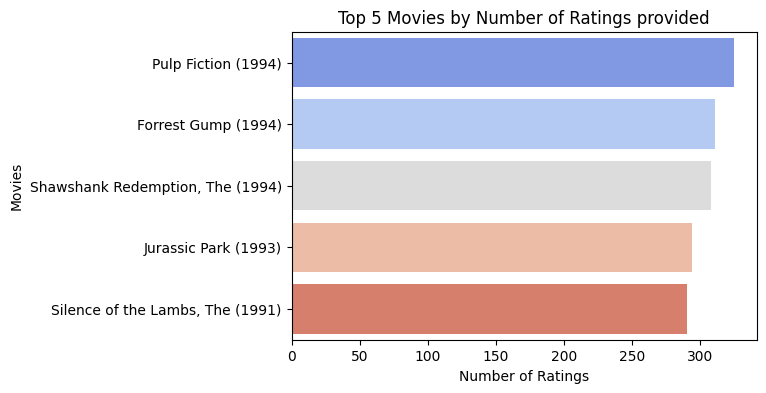

In [109]:
df2 = rating_movie.sort_values('Number of Ratings', ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(y=df2.head(5).index, x="Number of Ratings", data=df2.head(5), orient='h', palette="coolwarm", saturation=0.75,
                 dodge=False)

plt.xlabel("Number of Ratings")
plt.ylabel("Movies")
plt.title("Top 5 Movies by Number of Ratings provided")
plt.show()

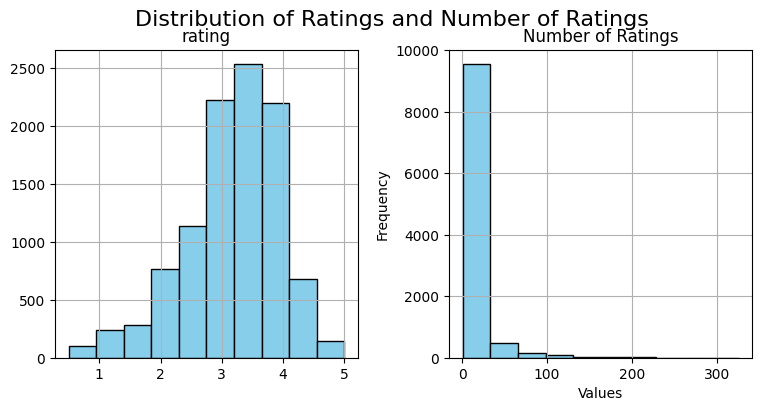

In [110]:
df2.hist(column=['rating', 'Number of Ratings'], color=['skyblue'], figsize=(9, 4), edgecolor='black')

plt.suptitle("Distribution of Ratings and Number of Ratings", fontsize=16)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()

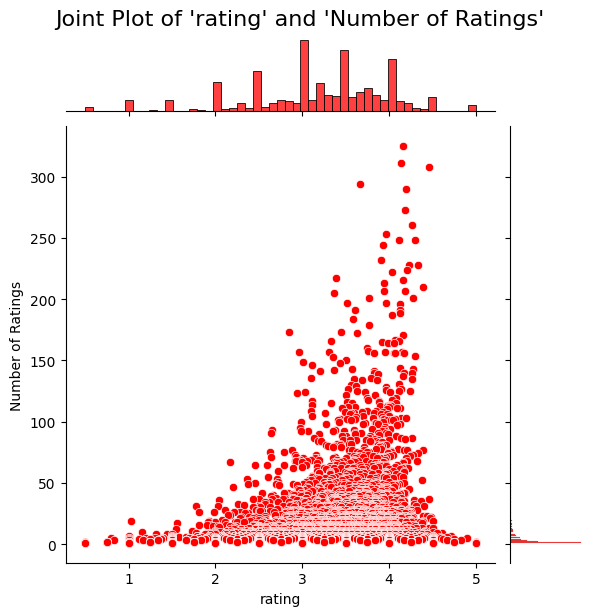

In [111]:
sns.jointplot(x='rating', y='Number of Ratings', data=df2, kind='scatter', color='red')
plt.suptitle("Joint Plot of 'rating' and 'Number of Ratings'", y=1.02, fontsize=16)
plt.show()

In [112]:
#Sorting values according to the 'num of rating column'
pivot_movie = movies_ratings_df.pivot_table(index ='userId',columns ='title', values ='rating')
pivot_movie.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. Create a popularity-based recommender system at a genre level.
The user will input a genre (g), minimum rating threshold (t) for a movie, and no. of recommendations(N) for which it should be recommended top N movies which are most popular within that genre (g) ordered by ratings in descending order where each movie has at least (t) reviews.

Example: Input:

Genre (g) : Comedy
Minimum reviews threshold (t) : 100
Num recommendations (N) : 5

In [113]:
def popularity_recommender(genre, min_reviews, num_recommendations):
    # Filter by genre and minimum review threshold
    genre_movies = movies_ratings_df[(movies_ratings_df['genres'] == genre) & (movies_ratings_df['rating'] >= min_reviews)]

    if genre_movies.empty:
        return "No movies found for the given genre and minimum review threshold."

    # Sort by ratings in descending order
    sorted_movies = genre_movies.sort_values(by='rating', ascending=False)

    # Recommend top N movies
    top_movies = sorted_movies.head(num_recommendations)

    return top_movies[['title', 'rating', 'userId']]

In [114]:
#input 1
genre = 'Comedy'
min_reviews_threshold = 5
num_recommendations = 10

# Get recommendations
recommendations = popularity_recommender(genre, min_reviews_threshold, num_recommendations)
recommendations

,title,rating,userId
1490,Clerks (1994),5.0,3
68756,Borat: Cultural Learnings of America for Make ...,5.0,591
68586,Big Business (1988),5.0,42
68599,Three Men and a Baby (1987),5.0,42
68723,Borat: Cultural Learnings of America for Make ...,5.0,60
68734,Borat: Cultural Learnings of America for Make ...,5.0,218
68736,Borat: Cultural Learnings of America for Make ...,5.0,228
68744,Borat: Cultural Learnings of America for Make ...,5.0,409
68751,Borat: Cultural Learnings of America for Make ...,5.0,531
69076,Cold Comfort Farm (1995),5.0,188


In [115]:
#input 2
genre = 'Drama'
min_reviews_threshold = 5
num_recommendations = 3

# Get recommendations
recommendations = popularity_recommender(genre, min_reviews_threshold, num_recommendations)
recommendations

,title,rating,userId
1914,Little Women (1994),5.0,31
71146,"Seventh Seal, The (Sjunde inseglet, Det) (1957)",5.0,267
71141,"Seventh Seal, The (Sjunde inseglet, Det) (1957)",5.0,189


2. Create a content-based recommender system that recommends top N movies based on similar movie(m) genres.
Example: Input:

Movie Title (t): Toy Story
Num recommendations (N): 5

In [116]:
movies_ratings_df.head()

,userId,movieId,rating,title,genres
0,1,16,4.0,Casino (1995),Crime|Drama
1,9,16,4.0,Casino (1995),Crime|Drama
2,12,16,1.5,Casino (1995),Crime|Drama
3,24,16,4.0,Casino (1995),Crime|Drama
4,29,16,3.0,Casino (1995),Crime|Drama


In [117]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [118]:
def content_based_recommender(movie_title, num_recommendations):
    # Find the row index of the input movie title
    movie_index = movies_ratings_df.index[movies_ratings_df['title'] == movies_ratings_df['title']].tolist()[0]

    # Extract genres of all movies
    genres = movies_ratings_df['genres']

    # Initialize CountVectorizer to convert text data into token counts
    count_vectorizer = CountVectorizer()
    genre_matrix = count_vectorizer.fit_transform(genres)

    # Calculate cosine similarity between the input movie and all other movies
    similarity_scores = cosine_similarity(genre_matrix, genre_matrix[movie_index])

    # Enumerate through similarity scores and keep track of movie indices
    movie_indices_scores = list(enumerate(similarity_scores))

    # Sort movie indices based on similarity scores
    sorted_movie_indices = sorted(movie_indices_scores, key=lambda x: x[1], reverse=True)

    # Exclude the input movie itself
    sorted_movie_indices = sorted_movie_indices[1:]

    # Recommend top N similar movies
    top_movie_indices = [index for index, _ in sorted_movie_indices[:num_recommendations]]
    recommended_movies = movies_ratings_df.iloc[top_movie_indices]

    return recommended_movies[['title', 'genres']]


In [119]:
import random
movie=random.choice(movies_ratings_df.title.unique())
print("Recommendation for movie :  {}\n".format(movie))
suggestion=content_based_recommender(movie,rating_movie["Number of Ratings"].max())
if(len(suggestion)==0):
    print("Not enough ratings to Recommend other Movies")
else:
    print(suggestion['title'])
#user can filter how many rating coutings is needed to get result

Recommendation for movie :  Mighty Morphin Power Rangers: The Movie (1995)

1                          Casino (1995)
2                          Casino (1995)
3                          Casino (1995)
4                          Casino (1995)
5                          Casino (1995)
                      ...               
2567    Shawshank Redemption, The (1994)
2568    Shawshank Redemption, The (1994)
2569    Shawshank Redemption, The (1994)
2570    Shawshank Redemption, The (1994)
2571    Shawshank Redemption, The (1994)
Name: title, Length: 325, dtype: object


In [120]:
# input 1
movie_title = 'Toy Story'
num_recommendations = 5

# Get recommendations
recommendations = content_based_recommender(movie_title, num_recommendations)
recommendations

,title,genres
1,Casino (1995),Crime|Drama
2,Casino (1995),Crime|Drama
3,Casino (1995),Crime|Drama
4,Casino (1995),Crime|Drama
5,Casino (1995),Crime|Drama


In [121]:
movies_ratings_df["title"].unique()

array(['Casino (1995)', 'Powder (1995)',
       'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)', ...,
       'The 50 Year Argument (2014)', 'Spotlight (2015)',
       'Pawn Sacrifice (2015)'], dtype=object)

In [122]:
# input:
movie_title = 'Casino (1995)'
num_recommendations = 3

user_ratings = pivot_movie[movie_title]

similar = pivot_movie.corrwith(user_ratings)

#Movies similar
corr = pd.DataFrame(similar, columns =['Correlation'])
corr.dropna(inplace = True)
corr= corr.join(rating_movie['Number of Ratings'])
corr.head()

,Correlation,Number of Ratings
title,,
"'burbs, The (1989)",0.894427,20
(500) Days of Summer (2009),0.683515,37
*batteries not included (1987),-1.000000,11
...And Justice for All (1979),0.301511,10
10 Items or Less (2006),1.000000,3


3. Create a collaborative based recommender system which recommends top N movies based on “K” similar users for a target user “u"¶
Example: Input:

UserID: 1
Num recommendations(N): 5
Threshold for similar users (k: 100

In [123]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

# Step 1: Create a user-item matrix
user_movie_matrix = movies_ratings_df.pivot_table(index='userId', columns='title', values='rating').fillna(0)

# Step 2: Use Nearest Neighbors to find similar users
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(user_movie_matrix)

def collaborative_recommender(user_id, num_recommendations, k):
    # Find the index of the target user
    target_user_index = user_movie_matrix.index.get_loc(user_id)

    # Use kneighbors to find K similar users
    _, similar_users_indices = knn_model.kneighbors(user_movie_matrix.iloc[target_user_index].values.reshape(1, -1), n_neighbors=k+1)

    # Flatten the list of similar users indices
    similar_users_indices = similar_users_indices.flatten()

    # Get movies watched by the target user
    movies_watched = user_movie_matrix.iloc[target_user_index][user_movie_matrix.iloc[target_user_index] > 0].index.tolist()

    # Create a list of movies recommended by similar users, excluding movies already watched
    recommended_movies = []
    for similar_user_index in similar_users_indices:
        similar_user_movies = user_movie_matrix.iloc[similar_user_index][user_movie_matrix.iloc[similar_user_index] > 0].index.tolist()
        recommended_movies.extend([movie for movie in similar_user_movies if movie not in movies_watched])

    # Get top N recommended movies
    recommended_movies = list(set(recommended_movies))[:num_recommendations]

    return pd.DataFrame({'title': recommended_movies})

In [124]:
# Example usage 1
user_id_input = 1
num_recommendations_input = 5
k_input = 100

collaborative_recommendations = collaborative_recommender(user_id_input, num_recommendations_input, k_input)
collaborative_recommendations

,title
0,"Limey, The (1999)"
1,"Terminator, The (1984)"
2,Dante's Peak (1997)
3,"American Tail, An (1986)"
4,Watchmen: Tales of the Black Freighter (2009)


In [125]:
# Example usage 2
user_id_input = 12
num_recommendations_input = 5
k_input = 100

collaborative_recommendations = collaborative_recommender(user_id_input, num_recommendations_input, k_input)
collaborative_recommendations

,title
0,Tales from the Crypt Presents: Bordello of Blo...
1,"Limey, The (1999)"
2,"Terminator, The (1984)"
3,Dark Star (1974)
4,Supercop 2 (Project S) (Chao ji ji hua) (1993)
